In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib
from scipy.signal import find_peaks
matplotlib.rcParams.update({'font.size': 17})

In [10]:
class line:
    def __init__(self, paths,names):
        self.names=names
        self.steps=[]
        self.intensitys=[]
        for path in paths:
            data = np.loadtxt(path)
            steps = []
            intensity = []
            for line in data:
                steps.append(line[0])
                intensity.append(line[1])
            self.steps.append(steps)
            self.intensitys.append(intensity)

    def plot_spectrum(self,title,legend):
        fig = plt.figure(figsize=(11, 6))
        gs = GridSpec(8, 5)
        fig1 = fig.add_subplot(gs[:, :])
        fig1.set_title(f"543,31nm Linie bei verschiedenen {title}")
        fig1.set_ylabel("Intensity in a.u.")
        fig1.set_xlabel("pmt Position")
        #fig1.set_xlim(10000, 40000)
        for i,pos in enumerate(self.names):
            fig1.plot(self.steps[i], self.intensitys[i], label=f"{pos} {legend}")
        plt.tight_layout()
        plt.legend(loc="upper right")
        plt.savefig(f"plots/{title}.pdf")
        plt.show()

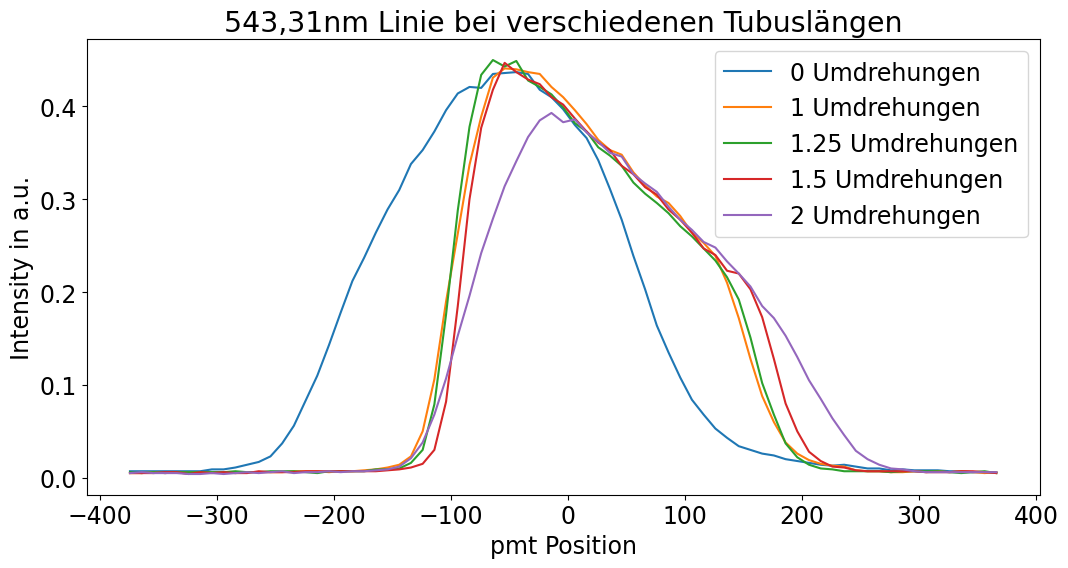

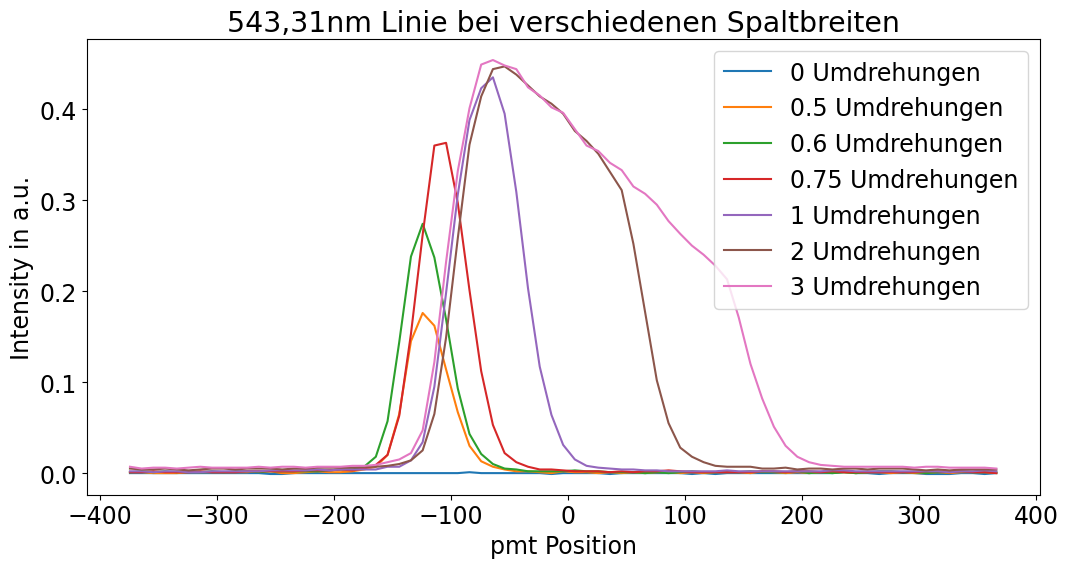

In [11]:
tubus_names=["00","1","125","15","2"]
files_tubus = [f"data/Tubuslaenge/laenge{pos}.dat" for pos in tubus_names]
tubus_names=["0","1","1.25","1.5","2"]
tubus = line(files_tubus,tubus_names)
tubus.plot_spectrum("Tubuslängen","Umdrehungen")
spalt_names=["0","05","06","075","1","2","3"]
files_spalt = [f"data/Spaltbreite/breite{pos}.dat" for pos in spalt_names]
spalt_names=["0","0.5","0.6","0.75","1","2","3"]
spalt = line(files_spalt,spalt_names)
spalt.plot_spectrum("Spaltbreiten","Umdrehungen")
